Demonstrat the unbiased estimate of $\sigma^2$

The variance of a random variable $X$, $\sigma^2 = Var(X)$, can be estimated by the unbiased estimator:

$
\begin{equation}
S^2_{n-1} = \frac{1}{n-1} \sum_i (x_i -\bar{x})^2
\end{equation}
$

where
$\bar{x} = \frac{1}{n}\sum_i$ is the sample mean, which is also the unbiased estimator for the population mean $\mu$.

Notice that the following is a $\textit{biased}$ estimator for $\sigma^2$ :

$
\begin{equation}
S^2_n = \frac{1}{n} \sum_i (x_i -\bar{x})^2
\end{equation}
$

Below we use Gaussian distrbution $\mathcal{N}(\mu, \sigma^2)$ to demonstrate.

In [2]:
import numpy as np
import pandas as pd

In [3]:
def computeError(actual, estimates):
    estimates = np.array(estimates)
    return np.mean(estimates-actual)

In [4]:
def performSimulation(mu, sigma, n, m):
    biased_measurements = []
    unbiased_measurements = []
    for _ in range(m):
        xs = np.random.normal(loc=mu, scale=sigma, size=n)
        biased_measurements.append(np.var(xs, ddof=0))
        unbiased_measurements.append(np.var(xs, ddof=1))
    biased_error = computeError(sigma, biased_measurements)
    unbiased_error = computeError(sigma, unbiased_measurements)
    return biased_error, unbiased_error

In [5]:
mu = 5
sigma = 2

n = 7  # number of samples to be averaged over
ms = [3, 5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240, 20480, 40960] # number of repeated trials
biased_errors = []
unbiased_errors = []
for m in ms:
    biased_error, unbiased_error = performSimulation(mu, sigma, n, m)
    biased_errors.append(biased_error)
    unbiased_errors.append(unbiased_error)
data = pd.DataFrame({'m': ms, 'biased_error': biased_errors, 'unbiased_error': unbiased_errors})
data = data[['m', 'biased_error', 'unbiased_error']]

In [6]:
data

,m,biased_error,unbiased_error
0,3,3.998010,4.997678
1,5,3.311439,4.196679
2,10,1.699595,2.316194
3,20,1.750880,2.376026
4,40,1.117283,1.636830
5,80,1.483881,2.064527
6,160,1.398697,1.965147
7,320,1.568789,2.163587
8,640,1.544675,2.135454
9,1280,1.456822,2.032959


In [7]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

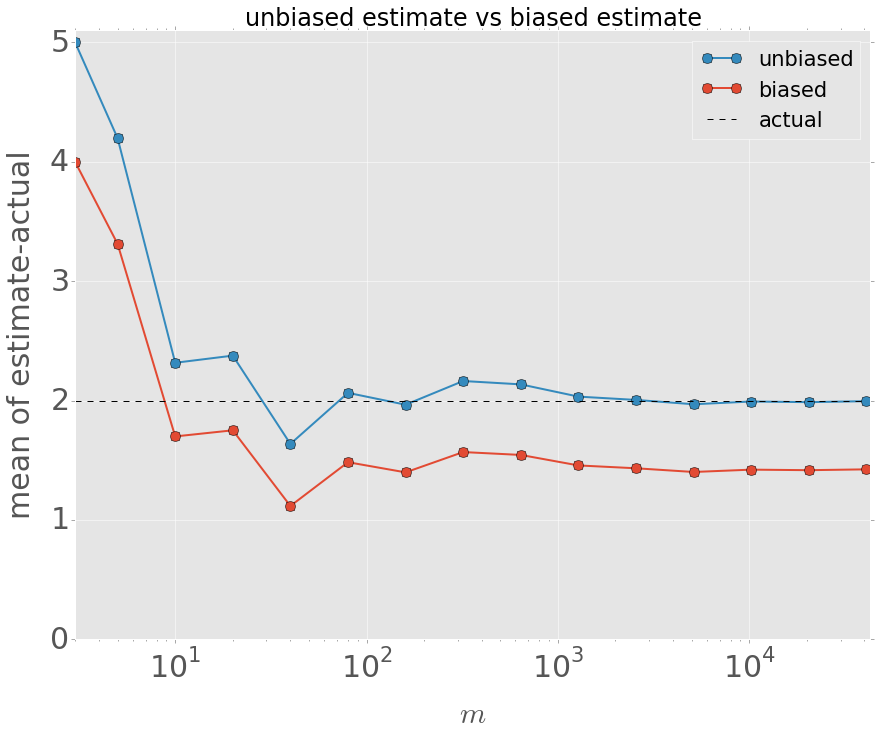

In [11]:
plt.close('all')
FONTSIZE=30
fig, ax = plt.subplots(1, figsize=(12, 10))

XMIN = 0
XMAX = np.max(ms) * 1.05
YMIN = 0
YMAX = 5.1

biased, = ax.plot(data['m'], data['biased_error'], lw=2, marker='o', markersize=10)
unbiased, = ax.plot(data['m'], data['unbiased_error'], lw=2, marker='o', markersize=10)
actual, = ax.plot([ms[0], ms[-1]], [sigma, sigma], lw=1, linestyle='--', color='k')
ax.set_xscale("log")
ax.set_xlim(XMIN, XMAX)
ax.set_ylim(YMIN, YMAX)
ax.set_xlabel(r'$m$', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('mean of estimate-actual', fontsize=FONTSIZE, labelpad=15)
ax.yaxis.set_ticks(np.arange(YMIN, YMAX, 1))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
lg = plt.legend((unbiased, biased, actual), 
                ('unbiased', 'biased', 'actual'),
                fontsize=FONTSIZE*0.7, loc='best')    
ax.set_title('unbiased estimate vs biased estimate', fontsize=0.8*FONTSIZE)
plt.tight_layout(pad=0, w_pad=6.0, h_pad=3.0)      